In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable
%matplotlib inline

# model Levi process

In [2]:
def brownian(t: np.ndarray):
    return np.cumsum(np.random.randn(t.shape[0])) / t.shape[0]


def f_1(x, nu_1: Callable, l, eps):
    assert l > 0, "invalid sampling params"
    if abs(x) < eps:
        return 0
    else:
        return nu_1(x) / l


def sample_f(nu: Callable, l, eps, m=10**6):
    """
    sample f-distributed iid rv
    using accept-reject method
    :param nu_1: d(nu)/dx
    :param l: lambda
    :param eps: epsilon
    :param m: number of samples in unif
    :return: f-distributed iid rv
    """
    u = np.random.uniform(size=[m,2])
    fu = np.array([
        f_1(x,nu,l,eps) for x in u[:,0]
    ])
    scale = fu.max()
    return np.array([
        u[i,1] for i in range(u.shape[0])
        if u[i,1]*scale <= fu[i]
    ])


def cpp(t: np.ndarray, nu:Callable, l, eps):
    res = []
    xi = sample_f(nu, l, eps)
    for ti in t:
        pp = np.random.poisson(l*ti)

        if pp > xi.shape[0]:
            xi_1 = sample_f(nu, l, eps)
            xi = np.array(list(xi).append(list(xi_1)))

        res.append(xi[:pp].sum())
    return res

def levi_1(t: np.ndarray, m0, sigma,
           l, eps, nu: Callable):
    brm = brownian(t)
    y = m0*t + sigma*brm
    z = cpp(t, nu, l, eps)
    return y + z

In [3]:
def nu_1(x, alpha=1/2):
    return (np.ones(x.shape)+0.5*np.cos(x)**2) / \
           (np.abs(x)**(1+alpha))


def nu_2(x):
    return np.exp(-x) / x

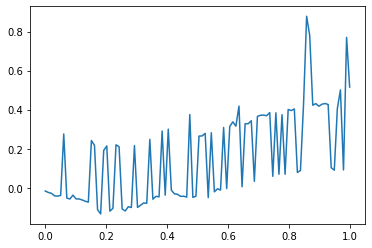

In [4]:
t = np.linspace(0,1,100)
x1 = levi_1(t,
           m0=0, sigma=1,
           l = 1, eps = 1/2,
           nu = nu_2)
plt.plot(t,x1)

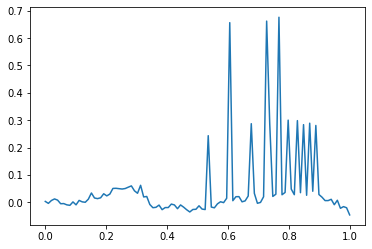

In [5]:
t = np.linspace(0,1,100)
x2 = levi_1(t,
           m0=0, sigma=1,
           l = 2, eps = 1/7,
           nu = nu_1)
plt.plot(t,x2)

# estimate call option :)

In [8]:
def f(x, m=0.1):
    return (x - m) * (x-m > 0)

In [9]:
f_x1 = f(x1)
f_x1.mean()

0.1274004104318451

In [10]:
f_x2 = f(x2)
f_x2.mean()

0.031633992371226556